## Plot the result for a 1 dimensional nonlinear estimation example

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem related
mu_p = 20
sig_p_sq = 9
f = 400
b = 0.1
sig_r_sq = 0.09
y = f * b / mu_p - 0.8

niters = 5
ss = 0.75
B = 1
p = 20
mu = mu_p
sig_sq = sig_p_sq
prec = 1 / sig_sq

# *****************************  phi(x) ************************** (85)
T = 1
x = np.linspace(0, 30, 100)  # Assuming x is a range from 0 to 30, adjust as needed
phi = T * ((x - mu_p) ** 2 / (2 * sig_p_sq) + (y - f * b / x) ** 2 / (2 * sig_r_sq))

%matplotlib inline


/tmp/ipykernel_127422/820011744.py:23: RuntimeWarning: divide by zero encountered in divide
  phi = T * ((x - mu_p) ** 2 / (2 * sig_p_sq) + (y - f * b / x) ** 2 / (2 * sig_r_sq))


---- plotting ----


<Figure size 1200x800 with 0 Axes>

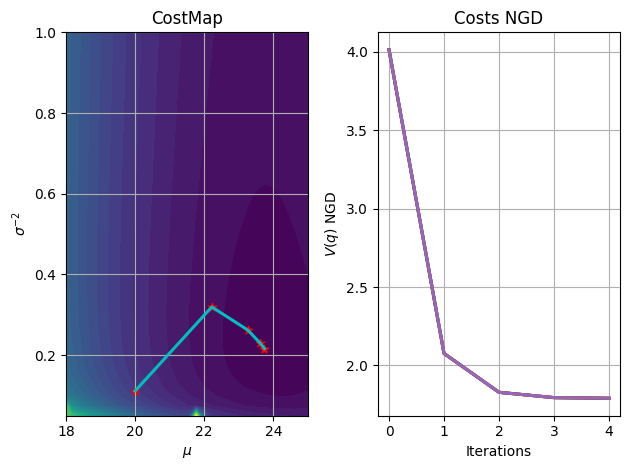

In [2]:
# Display plotting message
print("---- plotting ----")

# Reading the cost map data generated from cpp
cpp_costmap = np.loadtxt("../data/1d/costmap.csv", delimiter=",")
nmesh = 40
x_mesh = np.linspace(18, 25, nmesh)
y_mesh = np.linspace(0.05, 1, nmesh)
X, Y = np.meshgrid(x_mesh, y_mesh)

# ========================= Python iterations =========================
plt.figure(figsize=(12, 8))

# Read results
cpp_means = np.loadtxt("../data/1d/mean.csv", delimiter=",")
cpp_covs = np.loadtxt("../data/1d/cov.csv", delimiter=",")
cpp_costs = np.loadtxt("../data/1d/cost.csv", delimiter=",")
cpp_precs = 1.0 / cpp_covs

fig, (ax1, ax2) = plt.subplots(1, 2)
# Subplot 1
ax1.title.set_text("CostMap")
ax1.contourf(X, Y, cpp_costmap, nmesh)
ax1.grid(True)
ax1.plot(cpp_means, cpp_precs, 'c', linewidth=2.2)
for i_iter in range(1, niters + 1):
    ax1.scatter(cpp_means[i_iter - 1], cpp_precs[i_iter - 1], color='r', marker='*')

ax1.set_xlabel(r'$\mu$')
ax1.set_ylabel(r'$\sigma^{-2}$')

# Subplot 2
ax2.title.set_text(r'Costs NGD')
ax2.grid(True)
for i_iter in range(1, niters + 1):
    ax2.plot(cpp_costs, linewidth=2.2)

ax2.set_xlabel("Iterations")
ax2.set_ylabel(r'$V(q)$ NGD')

plt.tight_layout()
plt.savefig("figures/1d_NGD.pdf", bbox_inches='tight', dpi=2000)
plt.show()